In [29]:
import pandas as pd
import networkx as nx
import seaborn as sns
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [30]:
df=pd.read_csv("got-edges.csv",sep=',')


In [83]:
G=nx.from_pandas_edgelist(df, "Source", "Target","Weight")

Graph with 107 nodes and 352 edges


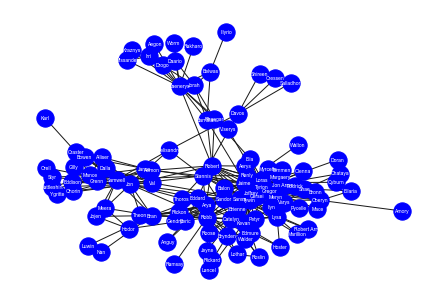

In [86]:
print(nx.info(G))
nx.draw(G,node_color="blue",with_labels=True,font_color='white',font_size=5)

In [85]:
Adj = nx.adjacency_matrix(G).todense()
Adj

matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [35]:
degree_sequence = [G.degree(n) for n in G.nodes]
import statistics

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 6.579439252336448
Median degree: 4


In [36]:
df.head(900)


,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
...,...,...,...
347,Walder,Petyr,6
348,Walder,Roslin,6
349,Walton,Jaime,10
350,Ygritte,Qhorin,7


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  352 non-null    object
 1   Target  352 non-null    object
 2   Weight  352 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB


In [38]:
##simulation 
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'playing'
    return state


In [39]:
initial_state(G)

{'Aemon': 'playing',
 'Grenn': 'playing',
 'Samwell': 'playing',
 'Aerys': 'playing',
 'Jaime': 'playing',
 'Robert': 'playing',
 'Tyrion': 'playing',
 'Tywin': 'playing',
 'Alliser': 'playing',
 'Mance': 'playing',
 'Amory': 'playing',
 'Oberyn': 'playing',
 'Arya': 'playing',
 'Anguy': 'playing',
 'Beric': 'playing',
 'Bran': 'playing',
 'Brynden': 'playing',
 'Cersei': 'playing',
 'Gendry': 'playing',
 'Gregor': 'playing',
 'Joffrey': 'playing',
 'Jon': 'playing',
 'Rickon': 'playing',
 'Roose': 'playing',
 'Sandor': 'playing',
 'Thoros': 'playing',
 'Balon': 'playing',
 'Loras': 'playing',
 'Belwas': 'playing',
 'Barristan': 'playing',
 'Illyrio': 'playing',
 'Hodor': 'playing',
 'Jojen': 'playing',
 'Luwin': 'playing',
 'Meera': 'playing',
 'Nan': 'playing',
 'Theon': 'playing',
 'Brienne': 'playing',
 'Bronn': 'playing',
 'Podrick': 'playing',
 'Lothar': 'playing',
 'Walder': 'playing',
 'Catelyn': 'playing',
 'Edmure': 'playing',
 'Hoster': 'playing',
 'Jeyne': 'playing',
 'Lysa

In [40]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'playing':
            if random.random() < P_AWAKEN:
                next_state[node] = 'running'
    return next_state

In [41]:
test_state = initial_state(G)
state_transition(G, test_state)

{'Aemon': 'running',
 'Aerys': 'running',
 'Amory': 'running',
 'Bran': 'running',
 'Gendry': 'running',
 'Joffrey': 'running',
 'Sandor': 'running',
 'Balon': 'running',
 'Illyrio': 'running',
 'Meera': 'running',
 'Jeyne': 'running',
 'Pycelle': 'running',
 'Karl': 'running',
 'Aegon': 'running',
 'Cressen': 'running',
 'Melisandre': 'running',
 'Marillion': 'running',
 'Mace': 'running',
 'Ramsay': 'running',
 'Chataya': 'running'}

In [56]:
## simulation

from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')

In [57]:
sim.state()

{'Aemon': 'playing',
 'Grenn': 'playing',
 'Samwell': 'playing',
 'Aerys': 'playing',
 'Jaime': 'playing',
 'Robert': 'playing',
 'Tyrion': 'playing',
 'Tywin': 'playing',
 'Alliser': 'playing',
 'Mance': 'playing',
 'Amory': 'playing',
 'Oberyn': 'playing',
 'Arya': 'playing',
 'Anguy': 'playing',
 'Beric': 'playing',
 'Bran': 'playing',
 'Brynden': 'playing',
 'Cersei': 'playing',
 'Gendry': 'playing',
 'Gregor': 'playing',
 'Joffrey': 'playing',
 'Jon': 'playing',
 'Rickon': 'playing',
 'Roose': 'playing',
 'Sandor': 'playing',
 'Thoros': 'playing',
 'Balon': 'playing',
 'Loras': 'playing',
 'Belwas': 'playing',
 'Barristan': 'playing',
 'Illyrio': 'playing',
 'Hodor': 'playing',
 'Jojen': 'playing',
 'Luwin': 'playing',
 'Meera': 'playing',
 'Nan': 'playing',
 'Theon': 'playing',
 'Brienne': 'playing',
 'Bronn': 'playing',
 'Podrick': 'playing',
 'Lothar': 'playing',
 'Walder': 'playing',
 'Catelyn': 'playing',
 'Edmure': 'playing',
 'Hoster': 'playing',
 'Jeyne': 'playing',
 'Lysa

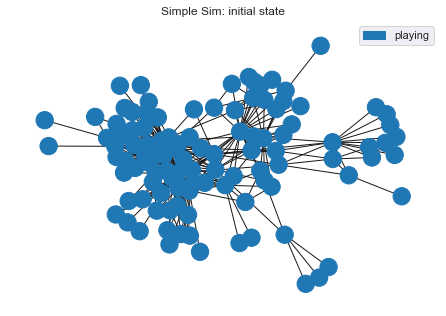

In [58]:
sim.draw()

In [59]:
sim.run()

In [60]:
sim.steps

1

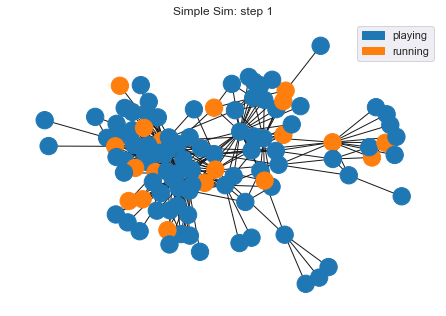

In [61]:
sim.draw()

In [62]:
sim.state()

{'Aemon': 'playing',
 'Grenn': 'running',
 'Samwell': 'playing',
 'Aerys': 'playing',
 'Jaime': 'playing',
 'Robert': 'playing',
 'Tyrion': 'running',
 'Tywin': 'playing',
 'Alliser': 'playing',
 'Mance': 'playing',
 'Amory': 'playing',
 'Oberyn': 'playing',
 'Arya': 'playing',
 'Anguy': 'playing',
 'Beric': 'running',
 'Bran': 'playing',
 'Brynden': 'playing',
 'Cersei': 'playing',
 'Gendry': 'running',
 'Gregor': 'playing',
 'Joffrey': 'playing',
 'Jon': 'playing',
 'Rickon': 'running',
 'Roose': 'playing',
 'Sandor': 'running',
 'Thoros': 'playing',
 'Balon': 'playing',
 'Loras': 'playing',
 'Belwas': 'playing',
 'Barristan': 'playing',
 'Illyrio': 'playing',
 'Hodor': 'playing',
 'Jojen': 'playing',
 'Luwin': 'playing',
 'Meera': 'playing',
 'Nan': 'playing',
 'Theon': 'playing',
 'Brienne': 'playing',
 'Bronn': 'playing',
 'Podrick': 'playing',
 'Lothar': 'playing',
 'Walder': 'playing',
 'Catelyn': 'playing',
 'Edmure': 'playing',
 'Hoster': 'playing',
 'Jeyne': 'running',
 'Lysa

In [63]:
sim.run(40)

In [64]:
sim.steps

41

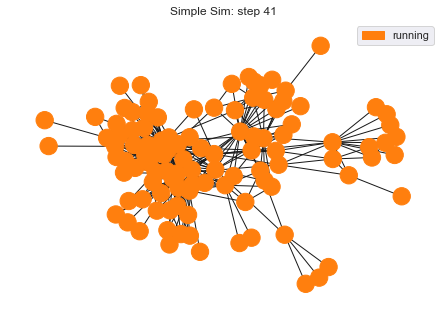

In [65]:
sim.draw()

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

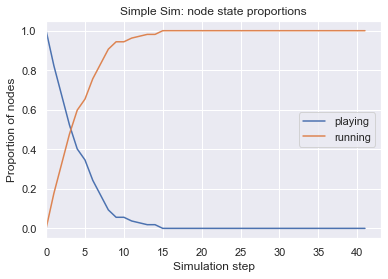

In [66]:
sim.plot()

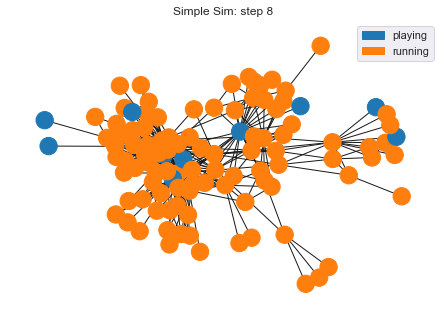

In [67]:
sim.draw(8)

In [68]:
sim.state(8)

{'Aemon': 'running',
 'Grenn': 'running',
 'Samwell': 'running',
 'Aerys': 'running',
 'Jaime': 'running',
 'Robert': 'running',
 'Tyrion': 'running',
 'Tywin': 'playing',
 'Alliser': 'running',
 'Mance': 'running',
 'Amory': 'playing',
 'Oberyn': 'running',
 'Arya': 'playing',
 'Anguy': 'running',
 'Beric': 'running',
 'Bran': 'running',
 'Brynden': 'running',
 'Cersei': 'running',
 'Gendry': 'running',
 'Gregor': 'running',
 'Joffrey': 'running',
 'Jon': 'playing',
 'Rickon': 'running',
 'Roose': 'running',
 'Sandor': 'running',
 'Thoros': 'running',
 'Balon': 'playing',
 'Loras': 'running',
 'Belwas': 'running',
 'Barristan': 'running',
 'Illyrio': 'running',
 'Hodor': 'running',
 'Jojen': 'running',
 'Luwin': 'running',
 'Meera': 'running',
 'Nan': 'running',
 'Theon': 'running',
 'Brienne': 'running',
 'Bronn': 'running',
 'Podrick': 'running',
 'Lothar': 'running',
 'Walder': 'running',
 'Catelyn': 'running',
 'Edmure': 'running',
 'Hoster': 'running',
 'Jeyne': 'running',
 'Lysa

<AxesSubplot:title={'center':'Simple Sim: node state proportions'}, xlabel='Simulation step', ylabel='Proportion of nodes'>

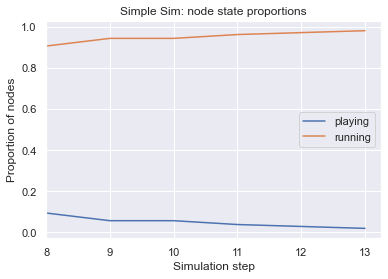

In [69]:
sim.plot(min_step=8, max_step=14)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

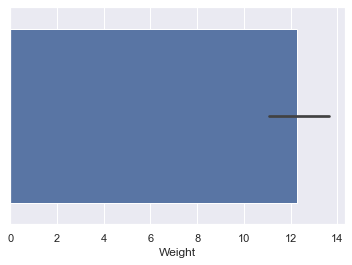

In [70]:
# Numeric Only

sns.barplot(df["Weight"])

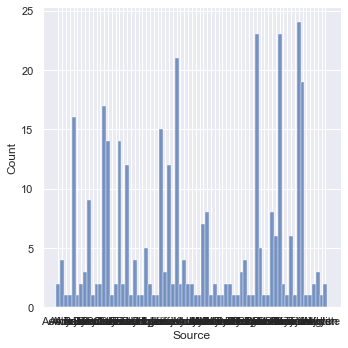

In [71]:
# 0ne column only
sns.displot(df["Source"])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


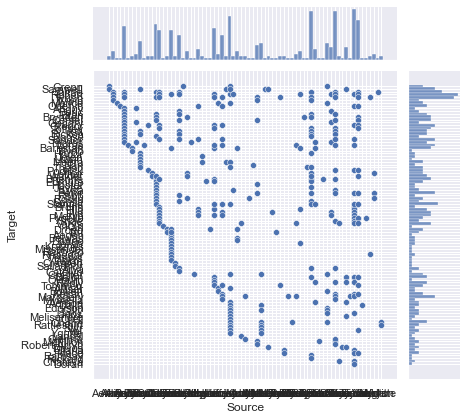

In [72]:
sns.jointplot(df["Source"],df["Target"],df["Weight"])

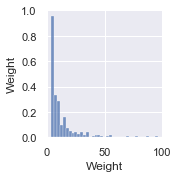

In [73]:
# Numeric only too
sns.pairplot(df[["Source","Target","Weight"]])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

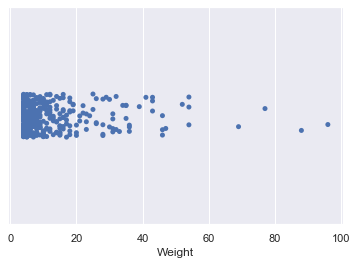

In [74]:
# Numeric Only
sns.stripplot(df["Weight"])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

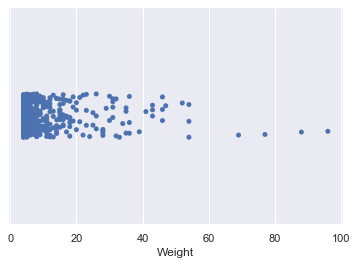

In [75]:
sns.stripplot(df["Weight"],jitter=True)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

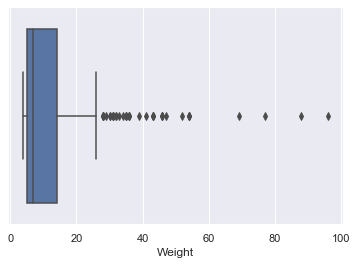

In [76]:
# Numeric Only
sns.boxplot(df["Weight"])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

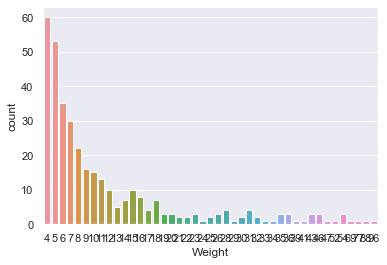

In [77]:
sns.countplot(df["Weight"])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Source'>

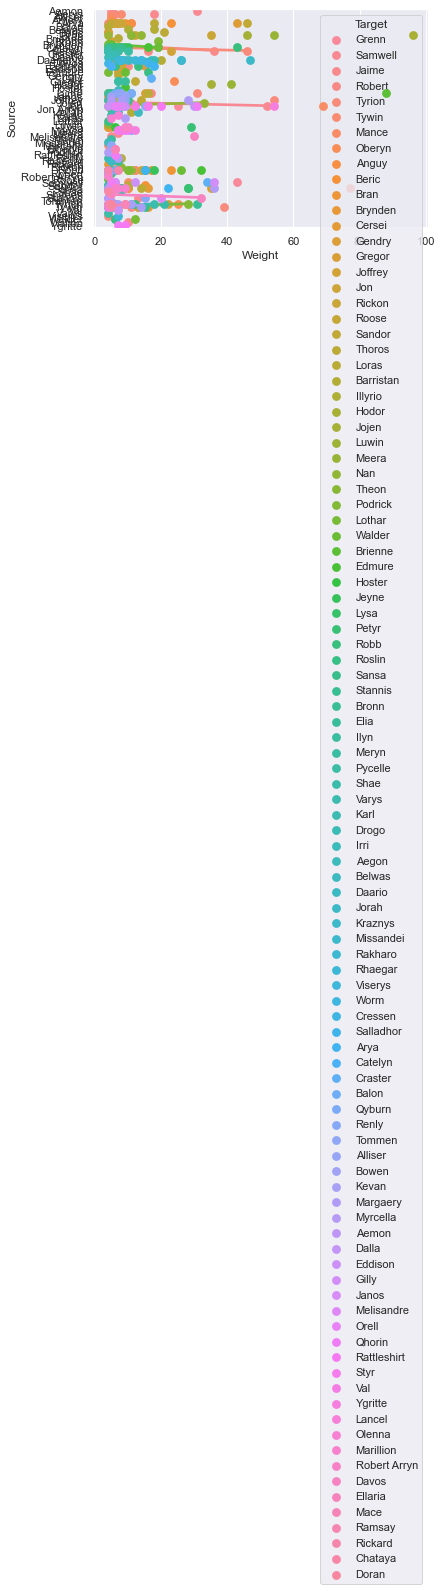

In [78]:
sns.pointplot(df["Weight"],df["Source"],df["Target"])

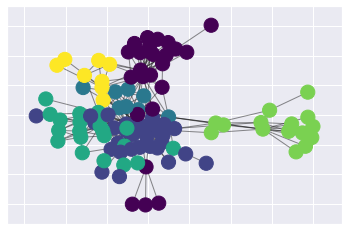

In [79]:
##community detection
import community.community_louvain as community_louvain

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the dataset
G=nx.from_pandas_edgelist(df, "Source", "Target","Weight")

#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=200,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<BarContainer object of 36 artists>

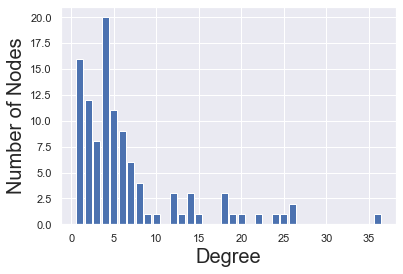

In [80]:
## degree destribution
G=nx.from_pandas_edgelist(df, "Source", "Target","Weight")
from collections import Counter
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

In [81]:
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18, 19, 20, 22, 24, 25, 26, 36]
22


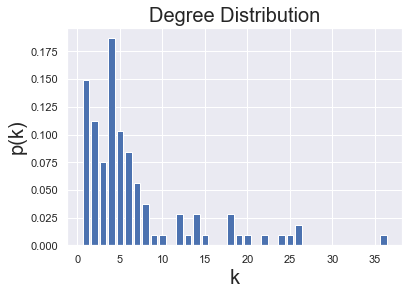

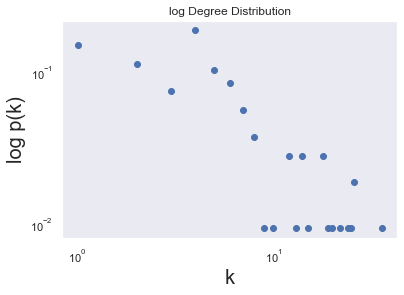

In [82]:
plot_degree_dist(G)
